In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
#import bibliotek

       Participant ID  Programming: R  Programming: Python  Programming: Bash  \
count       67.000000       59.000000            59.000000          59.000000   
mean        34.000000        1.847458             2.593220           1.305085   
std         19.485037        1.047387             0.697746           1.192711   
min          1.000000        0.000000             1.000000           0.000000   
25%         17.500000        1.000000             2.000000           0.000000   
50%         34.000000        2.000000             3.000000           1.000000   
75%         50.500000        2.000000             3.000000           2.000000   
max         67.000000        4.000000             4.000000           4.000000   

       Version Control: GIT  Containers: Docker  \
count             59.000000           59.000000   
mean               1.983051            1.372881   
std                1.252467            1.230339   
min                0.000000            0.000000   
25%            

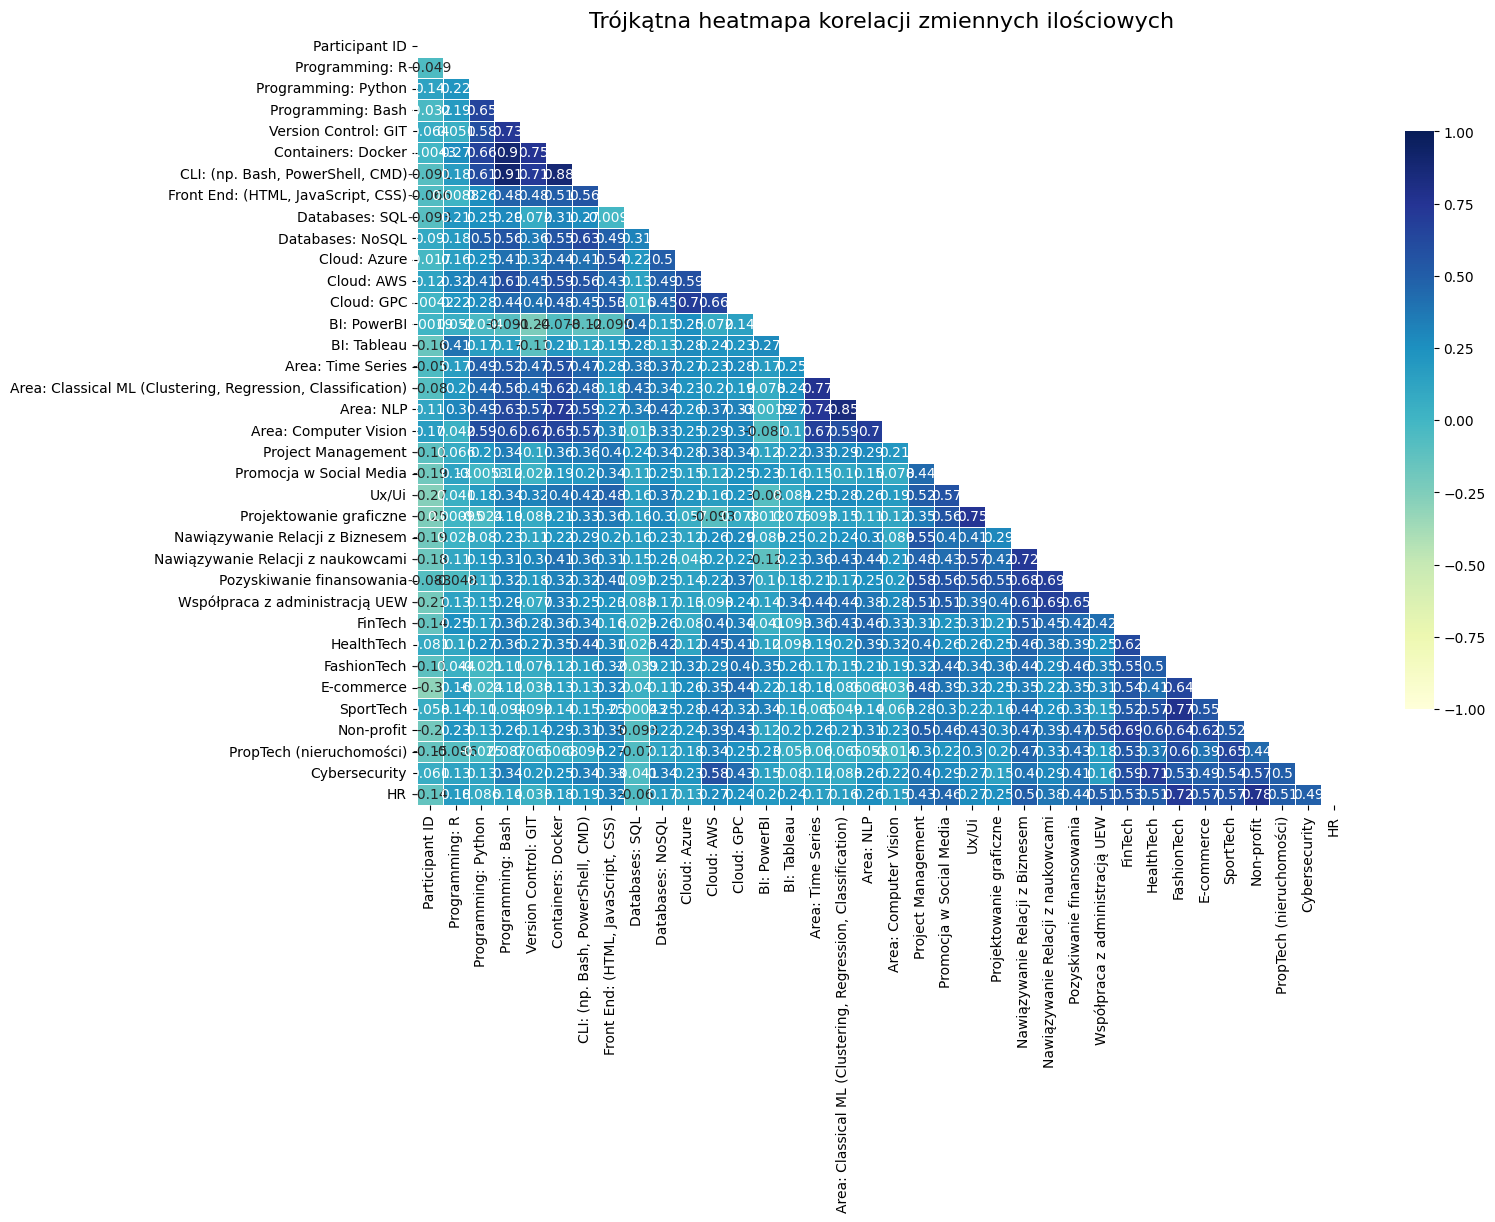

In [8]:
# Wczytanie danych z pliku Excel
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent

input_file_path = parent_directory_path / "data" / "03_Processed" / "Filtered_Selected_Features.csv"
data_filtered = pd.read_csv(input_file_path)

# Analiza korelacji zmiennych ilościowych
numerical_data = data_filtered.select_dtypes(include=['number'])

# Sprawdzenie danych po filtracji
print(numerical_data.describe())

# Tworzenie trójkątnej heatmapy korelacji
correlation_matrix = numerical_data.corr()

# Maskowanie górnej trójkątnej części macierzy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, vmin=-1, vmax=1, mask=mask, cbar_kws={"shrink": .75})
plt.title('Trójkątna heatmapa korelacji zmiennych ilościowych', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


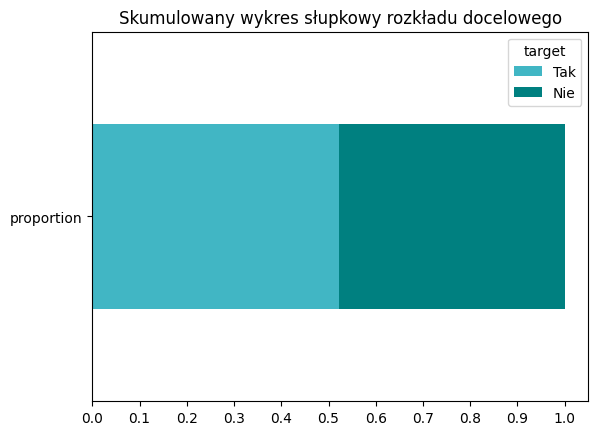

In [29]:
# Tworzenie skumulowanego wykresu słupkowego rozkładu docelowego
target_distribution = data_filtered["target"].value_counts(normalize=True).to_frame().T.plot.barh(stacked=True, color=["#41B6C4", "#008080"])

# data_filtered["target"].value_counts(normalize=True).to_frame().T.plot.barh(stacked=True)

# Ustawienie etykiet co 0.1 od 0 do 1
tick_values = [i/10.0 for i in range(11)]
target_distribution.set_xticks(tick_values)
target_distribution.set_xticklabels([f"{i/10.0:.1f}" for i in range(11)], fontsize=10)
plt.title('Skumulowany wykres słupkowy rozkładu docelowego', fontsize=12)

plt.show()

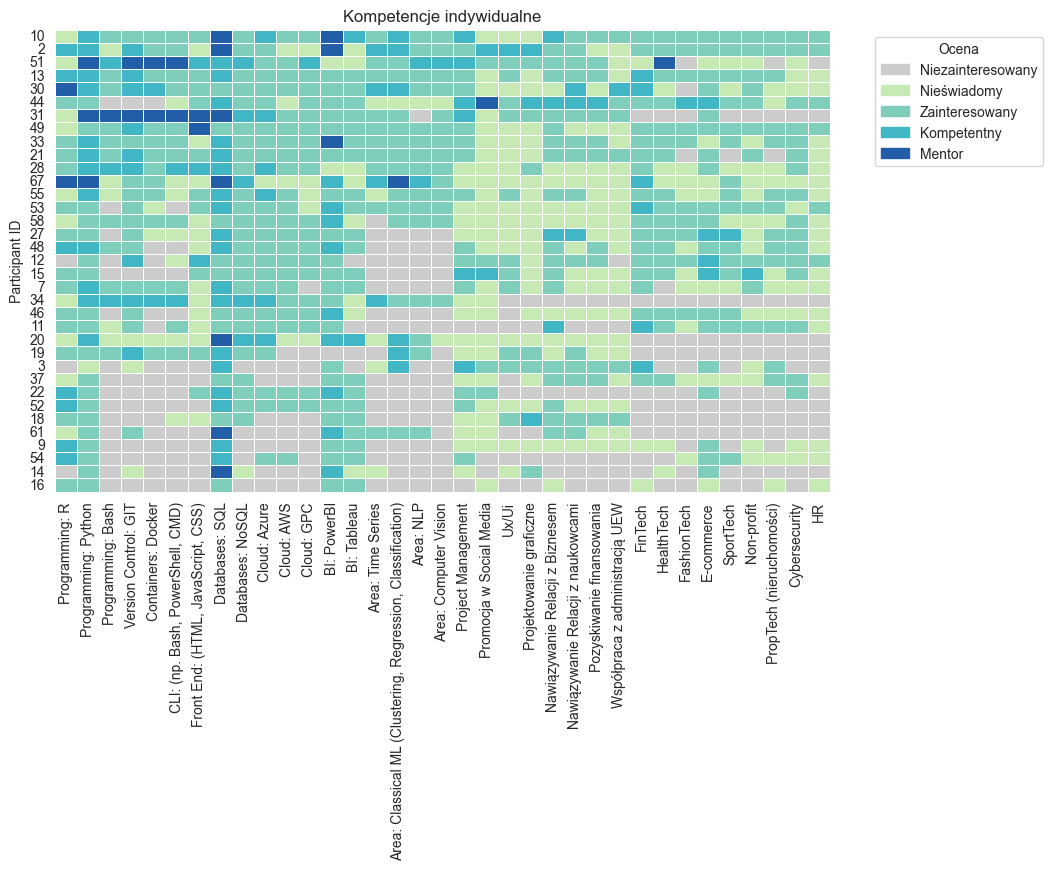

In [91]:
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

selected_data = data_filtered[data_filtered["target"] == 'Tak'].copy()

columns_to_exclude = ["Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:", 
                      "Jeżeli pominięto branżę, na której się znasz dopisz ją:", "Community Participation", "target"]
selected_data = selected_data.drop(columns=columns_to_exclude)

selected_data.set_index('Participant ID', inplace=True)

selected_data['Sum'] = selected_data.sum(axis=1)
selected_data = selected_data.sort_values(by='Sum', ascending=False).drop(columns=['Sum'])

colors = ['#CCCCCC', '#C7E9B4', '#7FCDBB', '#41B6C4', '#225EA8']
levels = [0.0, 1.0, 2.0, 3.0, 4.0]
cmap = ListedColormap(colors)

plt.figure(figsize=(10, 6))
sns.heatmap(selected_data, cmap=cmap, vmin=0.0, vmax=4.0, annot=False, fmt=".1f", cbar=False, linewidths=.5, linecolor='#FFFFFF')
plt.title('Kompetencje indywidualne')
plt.xlabel(' ')
plt.ylabel('Participant ID')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Tworzenie niestandardowego colorbar'a
legend_labels = ['Niezainteresowany', 'Nieświadomy', 'Zainteresowany', 'Kompetentny', 'Mentor']
legend_patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(handles=legend_patches, title='Ocena', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.yticks(ticks=np.arange(0.5, len(selected_data.index) + 0.5), labels=selected_data.index)

plt.show()
